In [1]:
#Importing Libraries
import pandas as pd ,seaborn as sns, numpy as np ,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Author: Miguel Angel Rizzo Gonzalez
#Single or multiple server queue simulation
l = 1 # average number of arrivals per minute
µ =1.5 # average number of people served per minute
ncust =1000# number of customers
c=1 # number of servers
#empty dictionary for computing the utilization with each configuration of servers
utilization={}

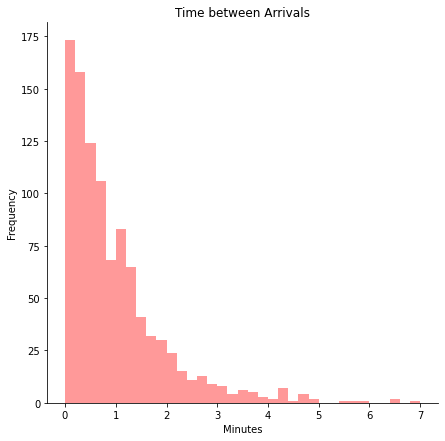

In [3]:
   #generating inter arrival times using exponential distribution
inter_arrival_times = list(np.random.exponential(scale=1/l,size=ncust))

    #plotting data
plt.figure(figsize=(7,7))
sns.distplot(inter_arrival_times,kde=False,color='r')
plt.title('Time between Arrivals')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()


In [4]:
arrival_times= []# list of arrival times of a person joining the queue
service_times = [] # list of service times once they reach the front
finish_times = [] # list of finish times after waiting and being served
        
arrival_times = [0 for i in range(ncust)]
finish_times = [0 for i in range(ncust)]
    
arrival_times[0]=round(inter_arrival_times[0],4)#arrival of first customer
#Generate arrival times
for i in range(1,ncust):
    arrival_times[i]=round((arrival_times[i-1]+inter_arrival_times[i]),4)
    

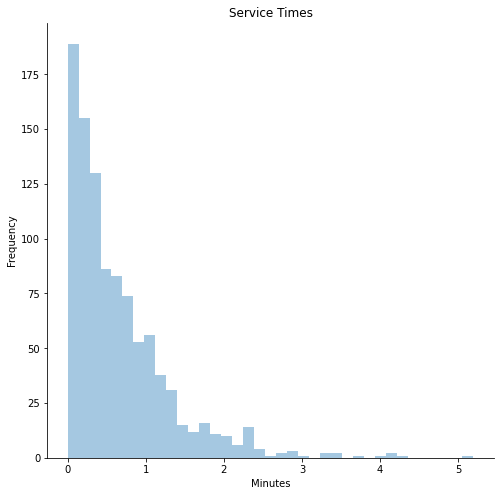

In [5]:

 # Generate random service times for each customer 
service_times = list(np.random.exponential(scale=1/µ,size=ncust))  

#service time distribution plot
plt.figure(figsize=(8,8))
sns.distplot(service_times,kde=False)
plt.title('Service Times')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

In [6]:
 
             #Generating finish times
finish_times[0]= round((arrival_times[0]+service_times[0]),4)
for i in range(1,ncust):
    previous_finish=finish_times[:i]
    previous_finish.sort(reverse=True)
    previous_finish=previous_finish[:c]
    if i< c:
        finish_times[i] = round(arrival_times[i] + service_times[i],4)
    else:
        finish_times[i]=round((max(arrival_times[i],min(previous_finish))+service_times[i]),4)    
    
 # Total time spent in the system by each customer
total_times =[abs(round((finish_times[i]-arrival_times[i]),4)) for i in range(ncust)]
    
    # Time spent@waiting before being served (time spent in the queue)
wait_times = [abs(round((total_times[i] - service_times[i]),4)) for i in range(ncust)]

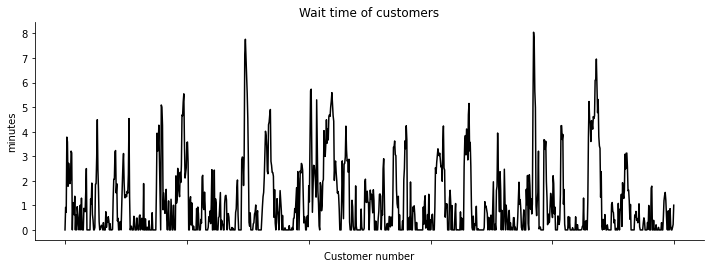

In [12]:
#plotting Wait times
plt.figure(figsize=(12,4))
sns.lineplot(x=data.index,y=wait_times,color='black').set(xticklabels=[])
plt.xlabel('Customer number')
plt.ylabel('minutes')
plt.title('Wait time of customers')
sns.despine()
plt.show()

In [7]:
  #creating a dataframe with all the data of the model
    
data = pd.DataFrame(list(zip(arrival_times,finish_times,service_times,total_times,wait_times,inter_arrival_times)), 
                columns =['arrival_times','finish_times', 'service_times','total_times','wait_times','inter_arrival_times']) 

#Printing the first 5 rows of the data
data.head()
    

,arrival_times,finish_times,service_times,total_times,wait_times,inter_arrival_times
0,1.7949,3.0644,1.269459,1.2695,0.0000,1.794872
1,2.1494,3.8620,0.797626,1.7126,0.9150,0.354532
2,3.1389,7.3659,3.503886,4.2270,0.7231,0.989520
3,3.5875,7.8759,0.510013,4.2884,3.7784,0.448650
4,4.2932,8.1767,0.300822,3.8835,3.5827,0.705746


In [8]:
tbe=list([0])
timeline=['simulation starts']
for i in range(0,ncust):
    tbe.append(data['arrival_times'][i])
    tbe.append(data['finish_times'][i])
    timeline.append('customer ' +str(i+1)+' arrived')
    timeline.append('customer ' +str(i+1)+' left')
        
    
#generating a dataframe with the timeline and description of events
    
timeline = pd.DataFrame(list(zip(tbe,timeline)), 
                columns =['time','Timeline']).sort_values(by='time').reset_index()
timeline=timeline.drop(columns='index')

#printing the first 5 rows of the data
timeline.head()
    

,time,Timeline
0,0.0000,simulation starts
1,1.7949,customer 1 arrived
2,2.1494,customer 2 arrived
3,3.0644,customer 1 left
4,3.1389,customer 3 arrived


In [9]:
#generating the number of customers inside the system at any given time of the simulation
    
timeline['n']=0
x=0
for i in range(1,(2*ncust)-1):
    if len(((timeline.Timeline[i]).split()))>2:
        z=str(timeline['Timeline'][i]).split()[2]
    else:
        continue
    if z =='arrived':
        x = x+1
        timeline['n'][i]=x
    else:
        x=x-1
        if x==-1:
            x=0
        timeline['n'][i]=x

In [25]:
    #computing time between events
    t= list()
    for i in timeline.index:
        if i == (2*ncust) -2 :
            continue
        if i < 2*ncust:
            x=timeline.time[i+1]
        else:
            x=timeline.time[i]
        y=timeline.time[i]
        t.append(round((x-y),4))
    
    t.append(0) 
    timeline['tbe']=t

In [26]:
#show results
timeline.head()

,time,Timeline,n,tbe
0,0.0000,simulation starts,0,1.7949
1,1.7949,customer 1 arrived,1,0.3545
2,2.1494,customer 2 arrived,2,0.9150
3,3.0644,customer 1 left,1,0.0745
4,3.1389,customer 3 arrived,2,0.4486


In [16]:
  #computing the probability and time spent of 'n' customers in the system
    
Pn=timeline.groupby('n').tbe.agg(sum)/sum(t)
Tn=timeline.groupby('n').tbe.agg('count')
timeline.groupby('n').tbe.agg(sum)/sum(t)

n
0     0.325243
1     0.219846
2     0.170902
3     0.105298
4     0.075201
5     0.051893
6     0.023801
7     0.011716
8     0.006875
9     0.003647
10    0.001898
11    0.001082
12    0.000796
13    0.000399
14    0.001388
15    0.000014
Name: tbe, dtype: float64

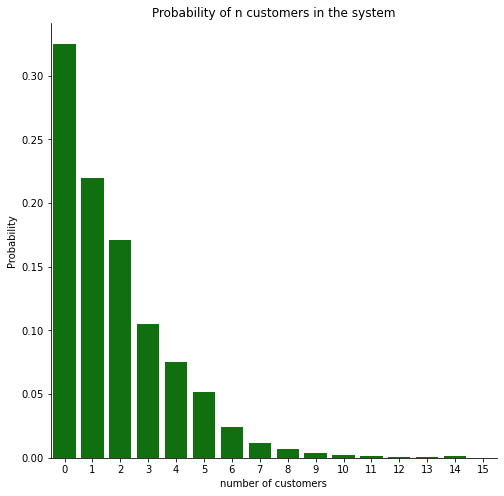

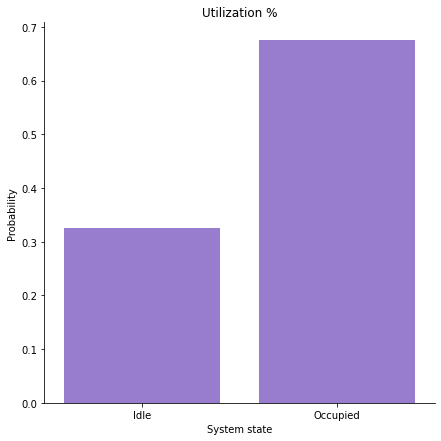

In [18]:
#plotting results
plt.figure(figsize=(8,8))
sns.barplot(x=Pn.index,y=Pn,color='g')
plt.title('Probability of n customers in the system')
plt.xlabel('number of customers')
plt.ylabel('Probability')
sns.despine()
plt.show()

plt.figure(figsize=(7,7))
sns.barplot(['Idle','Occupied'],[Pn[0],1-Pn[0]],color='mediumpurple')
plt.title('Utilization %')
plt.xlabel('System state')
plt.ylabel('Probability')
sns.despine()
plt.show()

In [23]:

    #computing expected number of customers in the system
Ls=(sum(Pn*Pn.index))
        
    #computing expected customers waiting in line
Lq=sum((Pn.index[c+1:]-1)*(Pn[c+1:]))
    

In [24]:
# Model Results
print('Output:','\n',
     'Servers : '+str(c),'\n '
     'Time Between Arrivals : ',str(data.inter_arrival_times.mean()),'\n',
     'Service Time: (1/µ)',str(data.service_times.mean()),'\n'
     ' Utilization (c): ',str((Ls-Lq)/c),'\n',
     'Expected wait time in line (Wq):',str(data['wait_times'].mean()),'\n',
     'Expected time spent on the system (Ws):',str(data.total_times.mean()),'\n',
     'Expected number of customers in line (Lq):',str(Lq),'\n',
     'Expected number of clients in the system (Ls):',str(Ls),'\n '
     'Expected number of occupied servers :',str(Ls-Lq),'\n')

Output: 
 Servers : 1 
 Time Between Arrivals :  0.9771710118681556 
 Service Time: (1/µ) 0.6605173880529018 
 Utilization (c):  0.6747568638633048 
 Expected wait time in line (Wq): 1.11596 
 Expected time spent on the system (Ws): 1.7764768999999998 
 Expected number of customers in line (Lq): 1.1409669337718809 
 Expected number of clients in the system (Ls): 1.8157237976351857 
 Expected number of occupied servers : 0.6747568638633048 

